In [1]:
# Para medir tiempos

import time

def procedure():
    time.sleep(2.5)

# measure process time
t0 = time.clock()
procedure()
print (time.clock() - t0, "seconds process time")

# measure wall time
t0 = time.time()
procedure()
print (time.time() - t0, "seconds wall time")


2.499861346295425 seconds process time
2.5105981826782227 seconds wall time


## Import Libraries

In [5]:
# Keras Datasets: 
#    https://jovianlin.io/datasets-within-keras/
# vemos este dataset: https://jovianlin.io/datasets-within-keras/#fashion_mnist
from keras.datasets import fashion_mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.utils import np_utils

# Set random seed (for reproducibility):
# https://machinelearningmastery.com/reproducible-results-neural-networks-keras/
import numpy as np
np.random.seed(42)

## Load Data

#### Number of clases

In [3]:
num_classes = 10

#### Load training and test datasets

In [6]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()


4423680/4422102 [==============================] - 1s 0us/step


#### Print shape of the original data

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


Label: 9
Shape: (28, 28)

AxesImage(54,36;334.8x217.44)


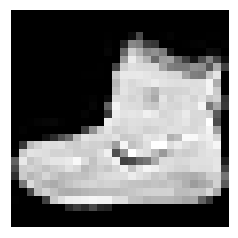

In [12]:
from termcolor import colored
%matplotlib inline
import matplotlib.pyplot as plt

def show_shapes(x_train, y_train, x_test, y_test, color='green'):
    print(colored('Training shape:', color, attrs=['bold']))
    print('  x_train.shape:', x_train.shape)
    print('  y_train.shape:', y_train.shape)
    print(colored('\nTesting shape:', color, attrs=['bold']))
    print('  x_test.shape:', x_test.shape)
    print('  y_test.shape:', y_test.shape)

def plot_data(my_data, cmap=None):
    plt.axis('off')
    fig = plt.imshow(my_data, cmap=cmap)
    fig.axes.get_xaxis().set_visible(False)
    fig.axes.get_yaxis().set_visible(False)
    print(fig)
    
def show_sample_image(x_train, y_train, idx=0, color='blue', cmap=None):
    print(colored('Label:', color, attrs=['bold']), y_train[idx])
    print(colored('Shape:', color, attrs=['bold']), x_train[idx].shape)
    print()
    plot_data(x_train[idx], cmap=cmap)
    
show_sample_image(X_train, y_train, cmap='gray')

#### Format and normalize training X data

In [13]:
# Format training data
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train =X_train.astype('float32')
X_test =X_test.astype('float32')

X_train /=255
X_test /=255

#### Format Y data: convert class vectors to binary class matrices

In [14]:
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [15]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

#### Print shape of the new formated data

In [16]:
y_train.shape

(60000, 10)

## Plot Training Results

#### Import plot libraries

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt

# Optional: Seaborn is a Python data visualization library based on matplotlib 
#    https://seaborn.pydata.org/
import seaborn as sns
sns.set()

#### Plot method

In [18]:
def plot_history(history):
    
    # Plot training & validation accuracy values
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

## Model Definition

In [19]:
# Compile method doc: https://keras.io/models/sequential/
# Optimizers doc: https://keras.io/optimizers/

In [20]:
def create_model():
    model = Sequential()
    
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dropout(0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', 
                  optimizer=RMSprop(), 
                  metrics=['accuracy'])

    return model

## Create a model and print model-summary

In [21]:
modelo=create_model()
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Example of Training:

In [22]:
batch_size = 128
nb_epoch = 20

In [23]:
modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.6134 - acc: 0.7815 - val_loss: 0.4681 - val_acc: 0.8367
Epoch 2/20
 - 2s - loss: 0.4315 - acc: 0.8438 - val_loss: 0.4038 - val_acc: 0.8582
Epoch 3/20
 - 2s - loss: 0.3886 - acc: 0.8597 - val_loss: 0.3881 - val_acc: 0.8624
Epoch 4/20
 - 2s - loss: 0.3647 - acc: 0.8680 - val_loss: 0.3840 - val_acc: 0.8643
Epoch 5/20
 - 2s - loss: 0.3489 - acc: 0.8726 - val_loss: 0.3636 - val_acc: 0.8739
Epoch 6/20
 - 2s - loss: 0.3362 - acc: 0.8785 - val_loss: 0.3653 - val_acc: 0.8710
Epoch 7/20
 - 2s - loss: 0.3247 - acc: 0.8823 - val_loss: 0.3582 - val_acc: 0.8782
Epoch 8/20
 - 2s - loss: 0.3216 - acc: 0.8825 - val_loss: 0.3436 - val_acc: 0.8811
Epoch 9/20
 - 2s - loss: 0.3138 - acc: 0.8860 - val_loss: 0.3538 - val_acc: 0.8740
Epoch 10/20
 - 2s - loss: 0.3053 - acc: 0.8885 - val_loss: 0.3418 - val_acc: 0.8805
Epoch 11/20
 - 2s - loss: 0.2992 - acc: 0.8901 - val_loss: 0.3562 - val_acc: 0.8746
Epoch 12/20
 - 2s - loss: 0.2975 - 

#### Evaluate trained model with test data

In [24]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print('Test loss:', test_loss_128)
print('Test accuracy:', test_acc_128)
print('Time (seconds): ', td_128)

10000/10000 [==============================] - 0s 24us/step
Test loss: 0.36411093229651453
Test accuracy: 0.8819
Time (seconds):  36.92611336708069


#### Plot training history

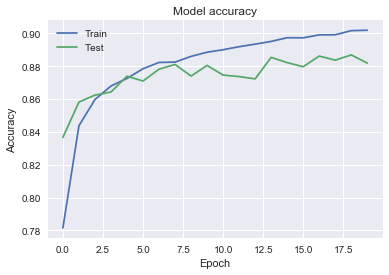

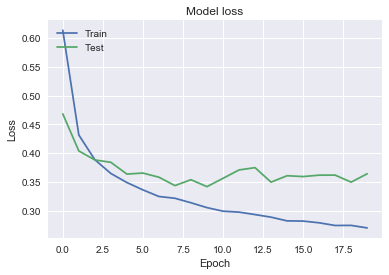

In [25]:
plot_history(history)

## Batch 8

In [26]:
batch_size = 8
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 16s - loss: 0.6332 - acc: 0.7937 - val_loss: 0.5466 - val_acc: 0.8310
Epoch 2/20
 - 16s - loss: 0.6527 - acc: 0.8215 - val_loss: 0.5650 - val_acc: 0.8461
Epoch 3/20
 - 17s - loss: 0.7241 - acc: 0.8175 - val_loss: 0.7587 - val_acc: 0.8286
Epoch 4/20
 - 18s - loss: 0.7850 - acc: 0.8161 - val_loss: 0.7425 - val_acc: 0.8165
Epoch 5/20
 - 18s - loss: 0.8350 - acc: 0.8143 - val_loss: 0.8286 - val_acc: 0.8373
Epoch 6/20
 - 16s - loss: 0.8680 - acc: 0.8137 - val_loss: 0.7812 - val_acc: 0.8284
Epoch 7/20
 - 16s - loss: 0.9089 - acc: 0.8136 - val_loss: 0.7688 - val_acc: 0.8308
Epoch 8/20
 - 15s - loss: 0.9452 - acc: 0.8103 - val_loss: 0.8742 - val_acc: 0.8011
Epoch 9/20
 - 17s - loss: 0.9750 - acc: 0.8082 - val_loss: 0.8592 - val_acc: 0.8235
Epoch 10/20
 - 17s - loss: 1.0101 - acc: 0.8088 - val_loss: 0.9267 - val_acc: 0.8265
Epoch 11/20
 - 17s - loss: 1.0319 - acc: 0.8077 - val_loss: 0.8919 - val_acc: 0.8067
Epoch 12/20
 - 16s - los

#### Evaluate trained model with test data

In [27]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")


print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 26us/step
batch_size:  8 , score:  [1.3310900840044022, 0.7943] , time_delta:  319.7011909484863


## Batch 16

In [28]:
batch_size = 16
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.5676 - acc: 0.8035 - val_loss: 0.4607 - val_acc: 0.8430
Epoch 2/20
 - 8s - loss: 0.5109 - acc: 0.8380 - val_loss: 0.5265 - val_acc: 0.8411
Epoch 3/20
 - 8s - loss: 0.5364 - acc: 0.8411 - val_loss: 0.4955 - val_acc: 0.8485
Epoch 4/20
 - 9s - loss: 0.5599 - acc: 0.8401 - val_loss: 0.5719 - val_acc: 0.8415
Epoch 5/20
 - 8s - loss: 0.5862 - acc: 0.8393 - val_loss: 0.5739 - val_acc: 0.8468
Epoch 6/20
 - 9s - loss: 0.6058 - acc: 0.8360 - val_loss: 0.5957 - val_acc: 0.8556
Epoch 7/20
 - 9s - loss: 0.6169 - acc: 0.8345 - val_loss: 0.6197 - val_acc: 0.8474
Epoch 8/20
 - 9s - loss: 0.6396 - acc: 0.8358 - val_loss: 0.5992 - val_acc: 0.8437
Epoch 9/20
 - 8s - loss: 0.6654 - acc: 0.8342 - val_loss: 0.6426 - val_acc: 0.8420
Epoch 10/20
 - 8s - loss: 0.6673 - acc: 0.8357 - val_loss: 0.6563 - val_acc: 0.8553
Epoch 11/20
 - 8s - loss: 0.6948 - acc: 0.8323 - val_loss: 0.7483 - val_acc: 0.8490
Epoch 12/20
 - 9s - loss: 0.7189 - 

#### Evaluate trained model with test data

In [29]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 22us/step
batch_size:  16 , score:  [0.8512793355941772, 0.8458] , time_delta:  171.91267466545105


## Batch 32

In [30]:
batch_size = 32
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 6s - loss: 0.5570 - acc: 0.8000 - val_loss: 0.4919 - val_acc: 0.8170
Epoch 2/20
 - 6s - loss: 0.4413 - acc: 0.8460 - val_loss: 0.4281 - val_acc: 0.8581
Epoch 3/20
 - 6s - loss: 0.4329 - acc: 0.8536 - val_loss: 0.4684 - val_acc: 0.8456
Epoch 4/20
 - 6s - loss: 0.4306 - acc: 0.8579 - val_loss: 0.4455 - val_acc: 0.8530
Epoch 5/20
 - 6s - loss: 0.4379 - acc: 0.8599 - val_loss: 0.4378 - val_acc: 0.8614
Epoch 6/20
 - 7s - loss: 0.4411 - acc: 0.8595 - val_loss: 0.4595 - val_acc: 0.8584
Epoch 7/20
 - 6s - loss: 0.4485 - acc: 0.8599 - val_loss: 0.4527 - val_acc: 0.8628
Epoch 8/20
 - 8s - loss: 0.4427 - acc: 0.8621 - val_loss: 0.4402 - val_acc: 0.8647
Epoch 9/20
 - 7s - loss: 0.4556 - acc: 0.8623 - val_loss: 0.4638 - val_acc: 0.8546
Epoch 10/20
 - 7s - loss: 0.4607 - acc: 0.8609 - val_loss: 0.5287 - val_acc: 0.8497
Epoch 11/20
 - 6s - loss: 0.4756 - acc: 0.8577 - val_loss: 0.4700 - val_acc: 0.8625
Epoch 12/20
 - 6s - loss: 0.4690 - 

#### Evaluate trained model with test data

In [31]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 27us/step
batch_size:  32 , score:  [0.509089030790329, 0.8667] , time_delta:  124.76237893104553


## Batch 64

In [32]:
batch_size = 64
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 4s - loss: 0.5667 - acc: 0.7989 - val_loss: 0.4423 - val_acc: 0.8407
Epoch 2/20
 - 3s - loss: 0.4216 - acc: 0.8480 - val_loss: 0.4044 - val_acc: 0.8604
Epoch 3/20
 - 3s - loss: 0.3893 - acc: 0.8614 - val_loss: 0.4102 - val_acc: 0.8533
Epoch 4/20
 - 3s - loss: 0.3727 - acc: 0.8669 - val_loss: 0.3786 - val_acc: 0.8684
Epoch 5/20
 - 3s - loss: 0.3635 - acc: 0.8728 - val_loss: 0.3771 - val_acc: 0.8639
Epoch 6/20
 - 3s - loss: 0.3596 - acc: 0.8738 - val_loss: 0.4036 - val_acc: 0.8660
Epoch 7/20
 - 3s - loss: 0.3530 - acc: 0.8773 - val_loss: 0.3930 - val_acc: 0.8623
Epoch 8/20
 - 3s - loss: 0.3507 - acc: 0.8783 - val_loss: 0.4075 - val_acc: 0.8701
Epoch 9/20
 - 3s - loss: 0.3479 - acc: 0.8800 - val_loss: 0.3942 - val_acc: 0.8732
Epoch 10/20
 - 3s - loss: 0.3483 - acc: 0.8819 - val_loss: 0.4135 - val_acc: 0.8669
Epoch 11/20
 - 3s - loss: 0.3461 - acc: 0.8836 - val_loss: 0.3802 - val_acc: 0.8777
Epoch 12/20
 - 3s - loss: 0.3432 - 

#### Evaluate trained model with test data

In [33]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 41us/step
batch_size:  64 , score:  [0.46213337883353234, 0.8745] , time_delta:  63.111350297927856


## Batch 128

In [34]:
batch_size = 128
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.6164 - acc: 0.7786 - val_loss: 0.4559 - val_acc: 0.8399
Epoch 2/20
 - 2s - loss: 0.4347 - acc: 0.8441 - val_loss: 0.4122 - val_acc: 0.8518
Epoch 3/20
 - 2s - loss: 0.3887 - acc: 0.8588 - val_loss: 0.3942 - val_acc: 0.8593
Epoch 4/20
 - 2s - loss: 0.3677 - acc: 0.8663 - val_loss: 0.4022 - val_acc: 0.8514
Epoch 5/20
 - 2s - loss: 0.3505 - acc: 0.8734 - val_loss: 0.3757 - val_acc: 0.8642
Epoch 6/20
 - 2s - loss: 0.3357 - acc: 0.8780 - val_loss: 0.3618 - val_acc: 0.8679
Epoch 7/20
 - 2s - loss: 0.3257 - acc: 0.8819 - val_loss: 0.3701 - val_acc: 0.8651
Epoch 8/20
 - 2s - loss: 0.3198 - acc: 0.8822 - val_loss: 0.3441 - val_acc: 0.8783
Epoch 9/20
 - 2s - loss: 0.3137 - acc: 0.8853 - val_loss: 0.3666 - val_acc: 0.8749
Epoch 10/20
 - 2s - loss: 0.3087 - acc: 0.8894 - val_loss: 0.3532 - val_acc: 0.8761
Epoch 11/20
 - 2s - loss: 0.2977 - acc: 0.8914 - val_loss: 0.3509 - val_acc: 0.8811
Epoch 12/20
 - 2s - loss: 0.2950 - 

#### Evaluate trained model with test data

In [35]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 27us/step
batch_size:  128 , score:  [0.36420524225234985, 0.8806] , time_delta:  38.04335880279541


## Batch 256

In [36]:
batch_size = 256
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.6879 - acc: 0.7567 - val_loss: 0.5438 - val_acc: 0.7958
Epoch 2/20
 - 1s - loss: 0.4566 - acc: 0.8350 - val_loss: 0.5291 - val_acc: 0.8154
Epoch 3/20
 - 1s - loss: 0.4066 - acc: 0.8525 - val_loss: 0.3955 - val_acc: 0.8573
Epoch 4/20
 - 1s - loss: 0.3790 - acc: 0.8627 - val_loss: 0.4055 - val_acc: 0.8529
Epoch 5/20
 - 1s - loss: 0.3596 - acc: 0.8696 - val_loss: 0.3815 - val_acc: 0.8639
Epoch 6/20
 - 1s - loss: 0.3443 - acc: 0.8741 - val_loss: 0.3561 - val_acc: 0.8720
Epoch 7/20
 - 1s - loss: 0.3307 - acc: 0.8792 - val_loss: 0.3850 - val_acc: 0.8612
Epoch 8/20
 - 1s - loss: 0.3215 - acc: 0.8815 - val_loss: 0.3639 - val_acc: 0.8685
Epoch 9/20
 - 1s - loss: 0.3109 - acc: 0.8864 - val_loss: 0.3944 - val_acc: 0.8559
Epoch 10/20
 - 1s - loss: 0.3059 - acc: 0.8869 - val_loss: 0.3708 - val_acc: 0.8676
Epoch 11/20
 - 1s - loss: 0.2996 - acc: 0.8892 - val_loss: 0.3395 - val_acc: 0.8791
Epoch 12/20
 - 2s - loss: 0.2905 - 

#### Evaluate trained model with test data

In [37]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 30us/step
batch_size:  256 , score:  [0.337424672794342, 0.8858] , time_delta:  31.423646926879883


## Batch 512

In [38]:
batch_size = 512
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.7836 - acc: 0.7203 - val_loss: 0.6316 - val_acc: 0.7522
Epoch 2/20
 - 2s - loss: 0.5055 - acc: 0.8185 - val_loss: 0.4597 - val_acc: 0.8325
Epoch 3/20
 - 1s - loss: 0.4405 - acc: 0.8407 - val_loss: 0.4580 - val_acc: 0.8297
Epoch 4/20
 - 1s - loss: 0.4065 - acc: 0.8526 - val_loss: 0.4431 - val_acc: 0.8393
Epoch 5/20
 - 1s - loss: 0.3842 - acc: 0.8608 - val_loss: 0.4163 - val_acc: 0.8500
Epoch 6/20
 - 1s - loss: 0.3680 - acc: 0.8645 - val_loss: 0.4882 - val_acc: 0.8255
Epoch 7/20
 - 1s - loss: 0.3560 - acc: 0.8711 - val_loss: 0.3654 - val_acc: 0.8689
Epoch 8/20
 - 1s - loss: 0.3418 - acc: 0.8744 - val_loss: 0.3931 - val_acc: 0.8578
Epoch 9/20
 - 1s - loss: 0.3332 - acc: 0.8786 - val_loss: 0.3883 - val_acc: 0.8583
Epoch 10/20
 - 1s - loss: 0.3223 - acc: 0.8806 - val_loss: 0.3742 - val_acc: 0.8639
Epoch 11/20
 - 1s - loss: 0.3150 - acc: 0.8837 - val_loss: 0.3824 - val_acc: 0.8573
Epoch 12/20
 - 1s - loss: 0.3079 - 

#### Evaluate trained model with test data

In [39]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 35us/step
batch_size:  512 , score:  [0.36985792779922483, 0.872] , time_delta:  28.654109716415405


## Batch 1024

In [40]:
batch_size = 1024
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 0.9499 - acc: 0.6666 - val_loss: 0.6344 - val_acc: 0.7532
Epoch 2/20
 - 1s - loss: 0.5870 - acc: 0.7914 - val_loss: 0.5328 - val_acc: 0.8007
Epoch 3/20
 - 1s - loss: 0.5039 - acc: 0.8205 - val_loss: 0.5104 - val_acc: 0.8134
Epoch 4/20
 - 1s - loss: 0.4601 - acc: 0.8346 - val_loss: 0.4386 - val_acc: 0.8453
Epoch 5/20
 - 1s - loss: 0.4283 - acc: 0.8438 - val_loss: 0.4259 - val_acc: 0.8468
Epoch 6/20
 - 1s - loss: 0.4046 - acc: 0.8526 - val_loss: 0.4305 - val_acc: 0.8419
Epoch 7/20
 - 1s - loss: 0.3891 - acc: 0.8573 - val_loss: 0.3790 - val_acc: 0.8626
Epoch 8/20
 - 2s - loss: 0.3782 - acc: 0.8607 - val_loss: 0.3766 - val_acc: 0.8644
Epoch 9/20
 - 1s - loss: 0.3667 - acc: 0.8657 - val_loss: 0.3903 - val_acc: 0.8582
Epoch 10/20
 - 2s - loss: 0.3550 - acc: 0.8698 - val_loss: 0.3842 - val_acc: 0.8596
Epoch 11/20
 - 1s - loss: 0.3474 - acc: 0.8717 - val_loss: 0.3719 - val_acc: 0.8699
Epoch 12/20
 - 1s - loss: 0.3400 - 

#### Evaluate trained model with test data

In [41]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 35us/step
batch_size:  1024 , score:  [0.3496745028197765, 0.8727] , time_delta:  27.752695322036743


## Batch 2048

In [42]:
batch_size = 2048
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 1.1801 - acc: 0.5962 - val_loss: 0.7110 - val_acc: 0.7426
Epoch 2/20
 - 1s - loss: 0.7177 - acc: 0.7455 - val_loss: 0.6203 - val_acc: 0.7821
Epoch 3/20
 - 1s - loss: 0.6116 - acc: 0.7827 - val_loss: 0.5674 - val_acc: 0.7913
Epoch 4/20
 - 1s - loss: 0.5500 - acc: 0.8049 - val_loss: 0.5412 - val_acc: 0.8040
Epoch 5/20
 - 1s - loss: 0.5091 - acc: 0.8168 - val_loss: 0.4789 - val_acc: 0.8316
Epoch 6/20
 - 1s - loss: 0.4822 - acc: 0.8274 - val_loss: 0.4945 - val_acc: 0.8157
Epoch 7/20
 - 1s - loss: 0.4580 - acc: 0.8336 - val_loss: 0.4557 - val_acc: 0.8303
Epoch 8/20
 - 1s - loss: 0.4372 - acc: 0.8424 - val_loss: 0.4528 - val_acc: 0.8361
Epoch 9/20
 - 1s - loss: 0.4284 - acc: 0.8427 - val_loss: 0.4777 - val_acc: 0.8244
Epoch 10/20
 - 1s - loss: 0.4109 - acc: 0.8509 - val_loss: 0.4334 - val_acc: 0.8469
Epoch 11/20
 - 1s - loss: 0.4052 - acc: 0.8523 - val_loss: 0.4044 - val_acc: 0.8544
Epoch 12/20
 - 1s - loss: 0.3895 - 

#### Evaluate trained model with test data

In [43]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 27us/step
batch_size:  2048 , score:  [0.36075781908035276, 0.8722] , time_delta:  25.305889129638672


## Batch 4096

In [44]:
batch_size = 4096
nb_epoch = 20



modelo = create_model()


# tiempo inicial
t0 = time.time()
# Keras fit function documentation: https://keras.io/models/sequential/
history = modelo.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=nb_epoch,
                    verbose=2,
                    validation_data=(X_test, y_test),
                    shuffle=True)
tf =  time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 1.3982 - acc: 0.5182 - val_loss: 0.8884 - val_acc: 0.6815
Epoch 2/20
 - 1s - loss: 0.8626 - acc: 0.6949 - val_loss: 0.7078 - val_acc: 0.7494
Epoch 3/20
 - 1s - loss: 0.7375 - acc: 0.7364 - val_loss: 0.6232 - val_acc: 0.7881
Epoch 4/20
 - 1s - loss: 0.6602 - acc: 0.7633 - val_loss: 0.5753 - val_acc: 0.7951
Epoch 5/20
 - 1s - loss: 0.6062 - acc: 0.7821 - val_loss: 0.5780 - val_acc: 0.7897
Epoch 6/20
 - 1s - loss: 0.5747 - acc: 0.7949 - val_loss: 0.5451 - val_acc: 0.8055
Epoch 7/20
 - 1s - loss: 0.5428 - acc: 0.8055 - val_loss: 0.5307 - val_acc: 0.8067
Epoch 8/20
 - 1s - loss: 0.5207 - acc: 0.8128 - val_loss: 0.4772 - val_acc: 0.8246
Epoch 9/20
 - 1s - loss: 0.5001 - acc: 0.8217 - val_loss: 0.5125 - val_acc: 0.8043
Epoch 10/20
 - 1s - loss: 0.4833 - acc: 0.8254 - val_loss: 0.4598 - val_acc: 0.8408
Epoch 11/20
 - 1s - loss: 0.4686 - acc: 0.8320 - val_loss: 0.4753 - val_acc: 0.8202
Epoch 12/20
 - 1s - loss: 0.4518 - 

#### Evaluate trained model with test data

In [45]:
score = modelo.evaluate(X_test, y_test)
time_delta = tf-t0
exec("batch_size_" + str(batch_size) + "= batch_size")
exec("test_loss_" + str(batch_size) + "= score[0]")
exec("test_acc_" + str(batch_size) + "= score[1]")
exec("td_" + str(batch_size) + "= time_delta")

print("batch_size: ", batch_size, ", score: ", score, ", time_delta: ", time_delta)

10000/10000 [==============================] - 0s 29us/step
batch_size:  4096 , score:  [0.4187217040061951, 0.8474] , time_delta:  23.777918100357056


In [46]:
batch_size_list = [batch_size_8, batch_size_16, batch_size_32, batch_size_64, batch_size_128, batch_size_256, batch_size_512, batch_size_1024, batch_size_2048, batch_size_4096]
test_loss_list = [test_loss_8, test_loss_16, test_loss_32, test_loss_64, test_loss_128, test_loss_256, test_loss_512, test_loss_1024, test_loss_2048, test_loss_4096]
test_acc_list = [test_acc_8, test_acc_16, test_acc_32, test_acc_64, test_acc_128, test_acc_256, test_acc_512, test_acc_1024, test_acc_2048, test_acc_4096]
td_list = [td_8, td_16, td_32, td_64, td_128, td_256, td_512, td_1024, td_2048, td_4096]

In [47]:
print(batch_size_list)
print(test_loss_list)
print(test_acc_list)
print(td_list)

[8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]
[1.3310900840044022, 0.8512793355941772, 0.509089030790329, 0.46213337883353234, 0.36420524225234985, 0.337424672794342, 0.36985792779922483, 0.3496745028197765, 0.36075781908035276, 0.4187217040061951]
[0.7943, 0.8458, 0.8667, 0.8745, 0.8806, 0.8858, 0.872, 0.8727, 0.8722, 0.8474]
[319.7011909484863, 171.91267466545105, 124.76237893104553, 63.111350297927856, 38.04335880279541, 31.423646926879883, 28.654109716415405, 27.752695322036743, 25.305889129638672, 23.777918100357056]


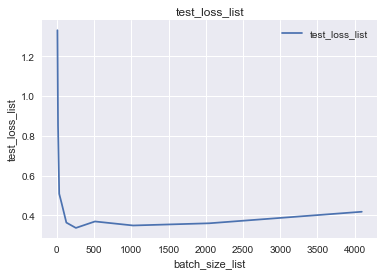

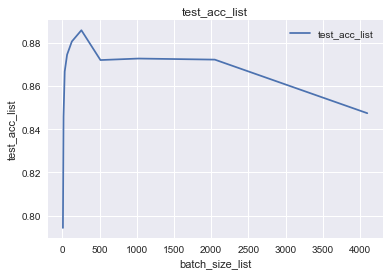

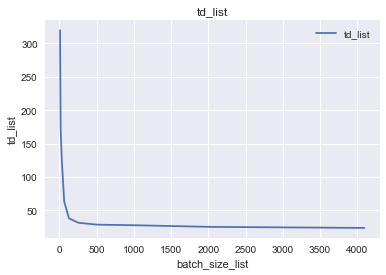

In [48]:
# Plot training & validation accuracy values
plt.plot(batch_size_list,test_loss_list)
plt.title('test_loss_list')
plt.ylabel('test_loss_list')
plt.xlabel('batch_size_list')
plt.legend(['test_loss_list'], loc='upper right')
plt.show()

plt.plot(batch_size_list,test_acc_list)
plt.title('test_acc_list')
plt.ylabel('test_acc_list')
plt.xlabel('batch_size_list')
plt.legend(['test_acc_list'], loc='upper right')
plt.show()

plt.plot(batch_size_list,td_list)
plt.title('td_list')
plt.ylabel('td_list')
plt.xlabel('batch_size_list')
plt.legend(['td_list'], loc='upper right')
plt.show()